<a href="https://colab.research.google.com/github/AnalyticsKnight/yemoonsaBigdata/blob/dev/template_boston_housing_v0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import KFold, train_test_split


import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
dat = pd.read_csv('housing.csv', header=None, delimiter=r"\s+")
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dat.columns = col_names

In [ ]:
dat.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## 데이터 탐색 및 전처리 

In [ ]:
dat.describe()

# dat.isnull().sum()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


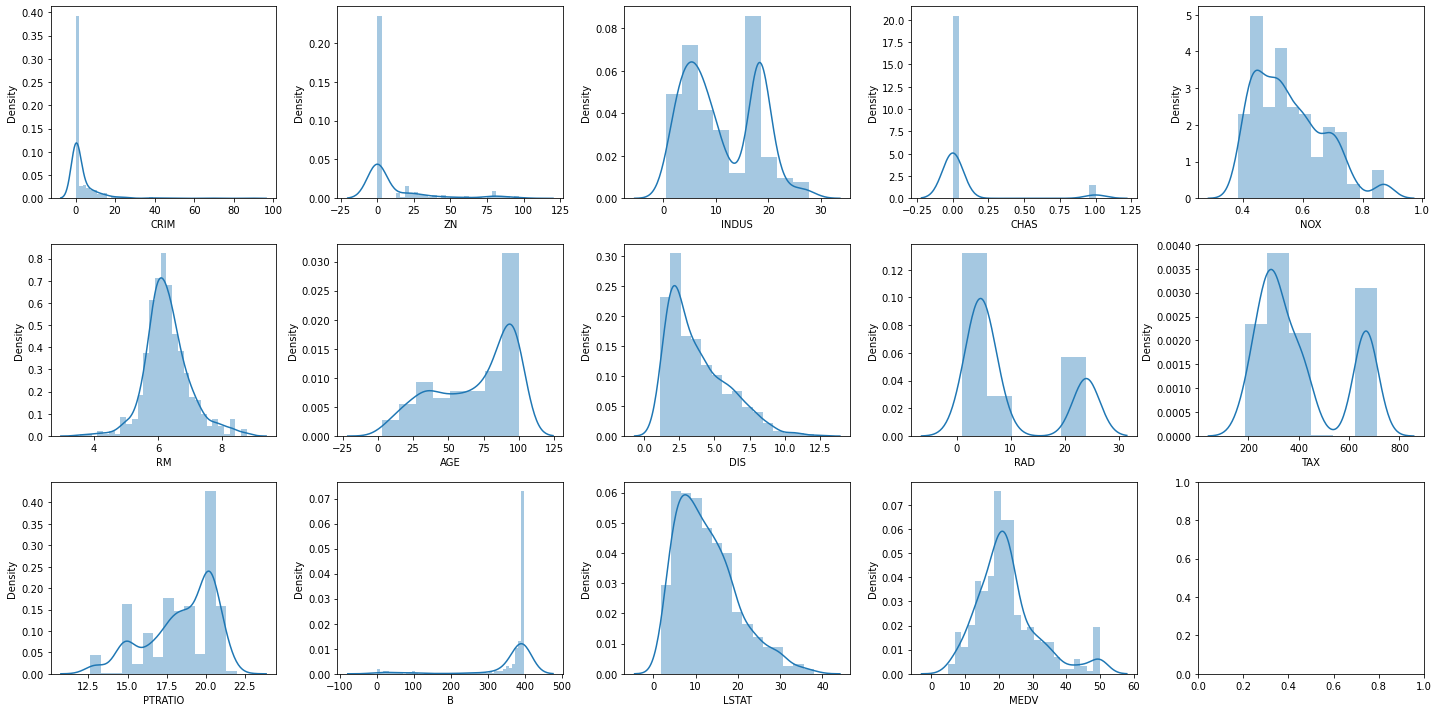

In [ ]:
### 데이터 분포 시각화
fig, axes = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
axes = axes.flatten()

for i, _col in enumerate(dat.columns):
    sns.distplot(dat[_col], ax=axes[i])
    
plt.tight_layout()
plt.show()

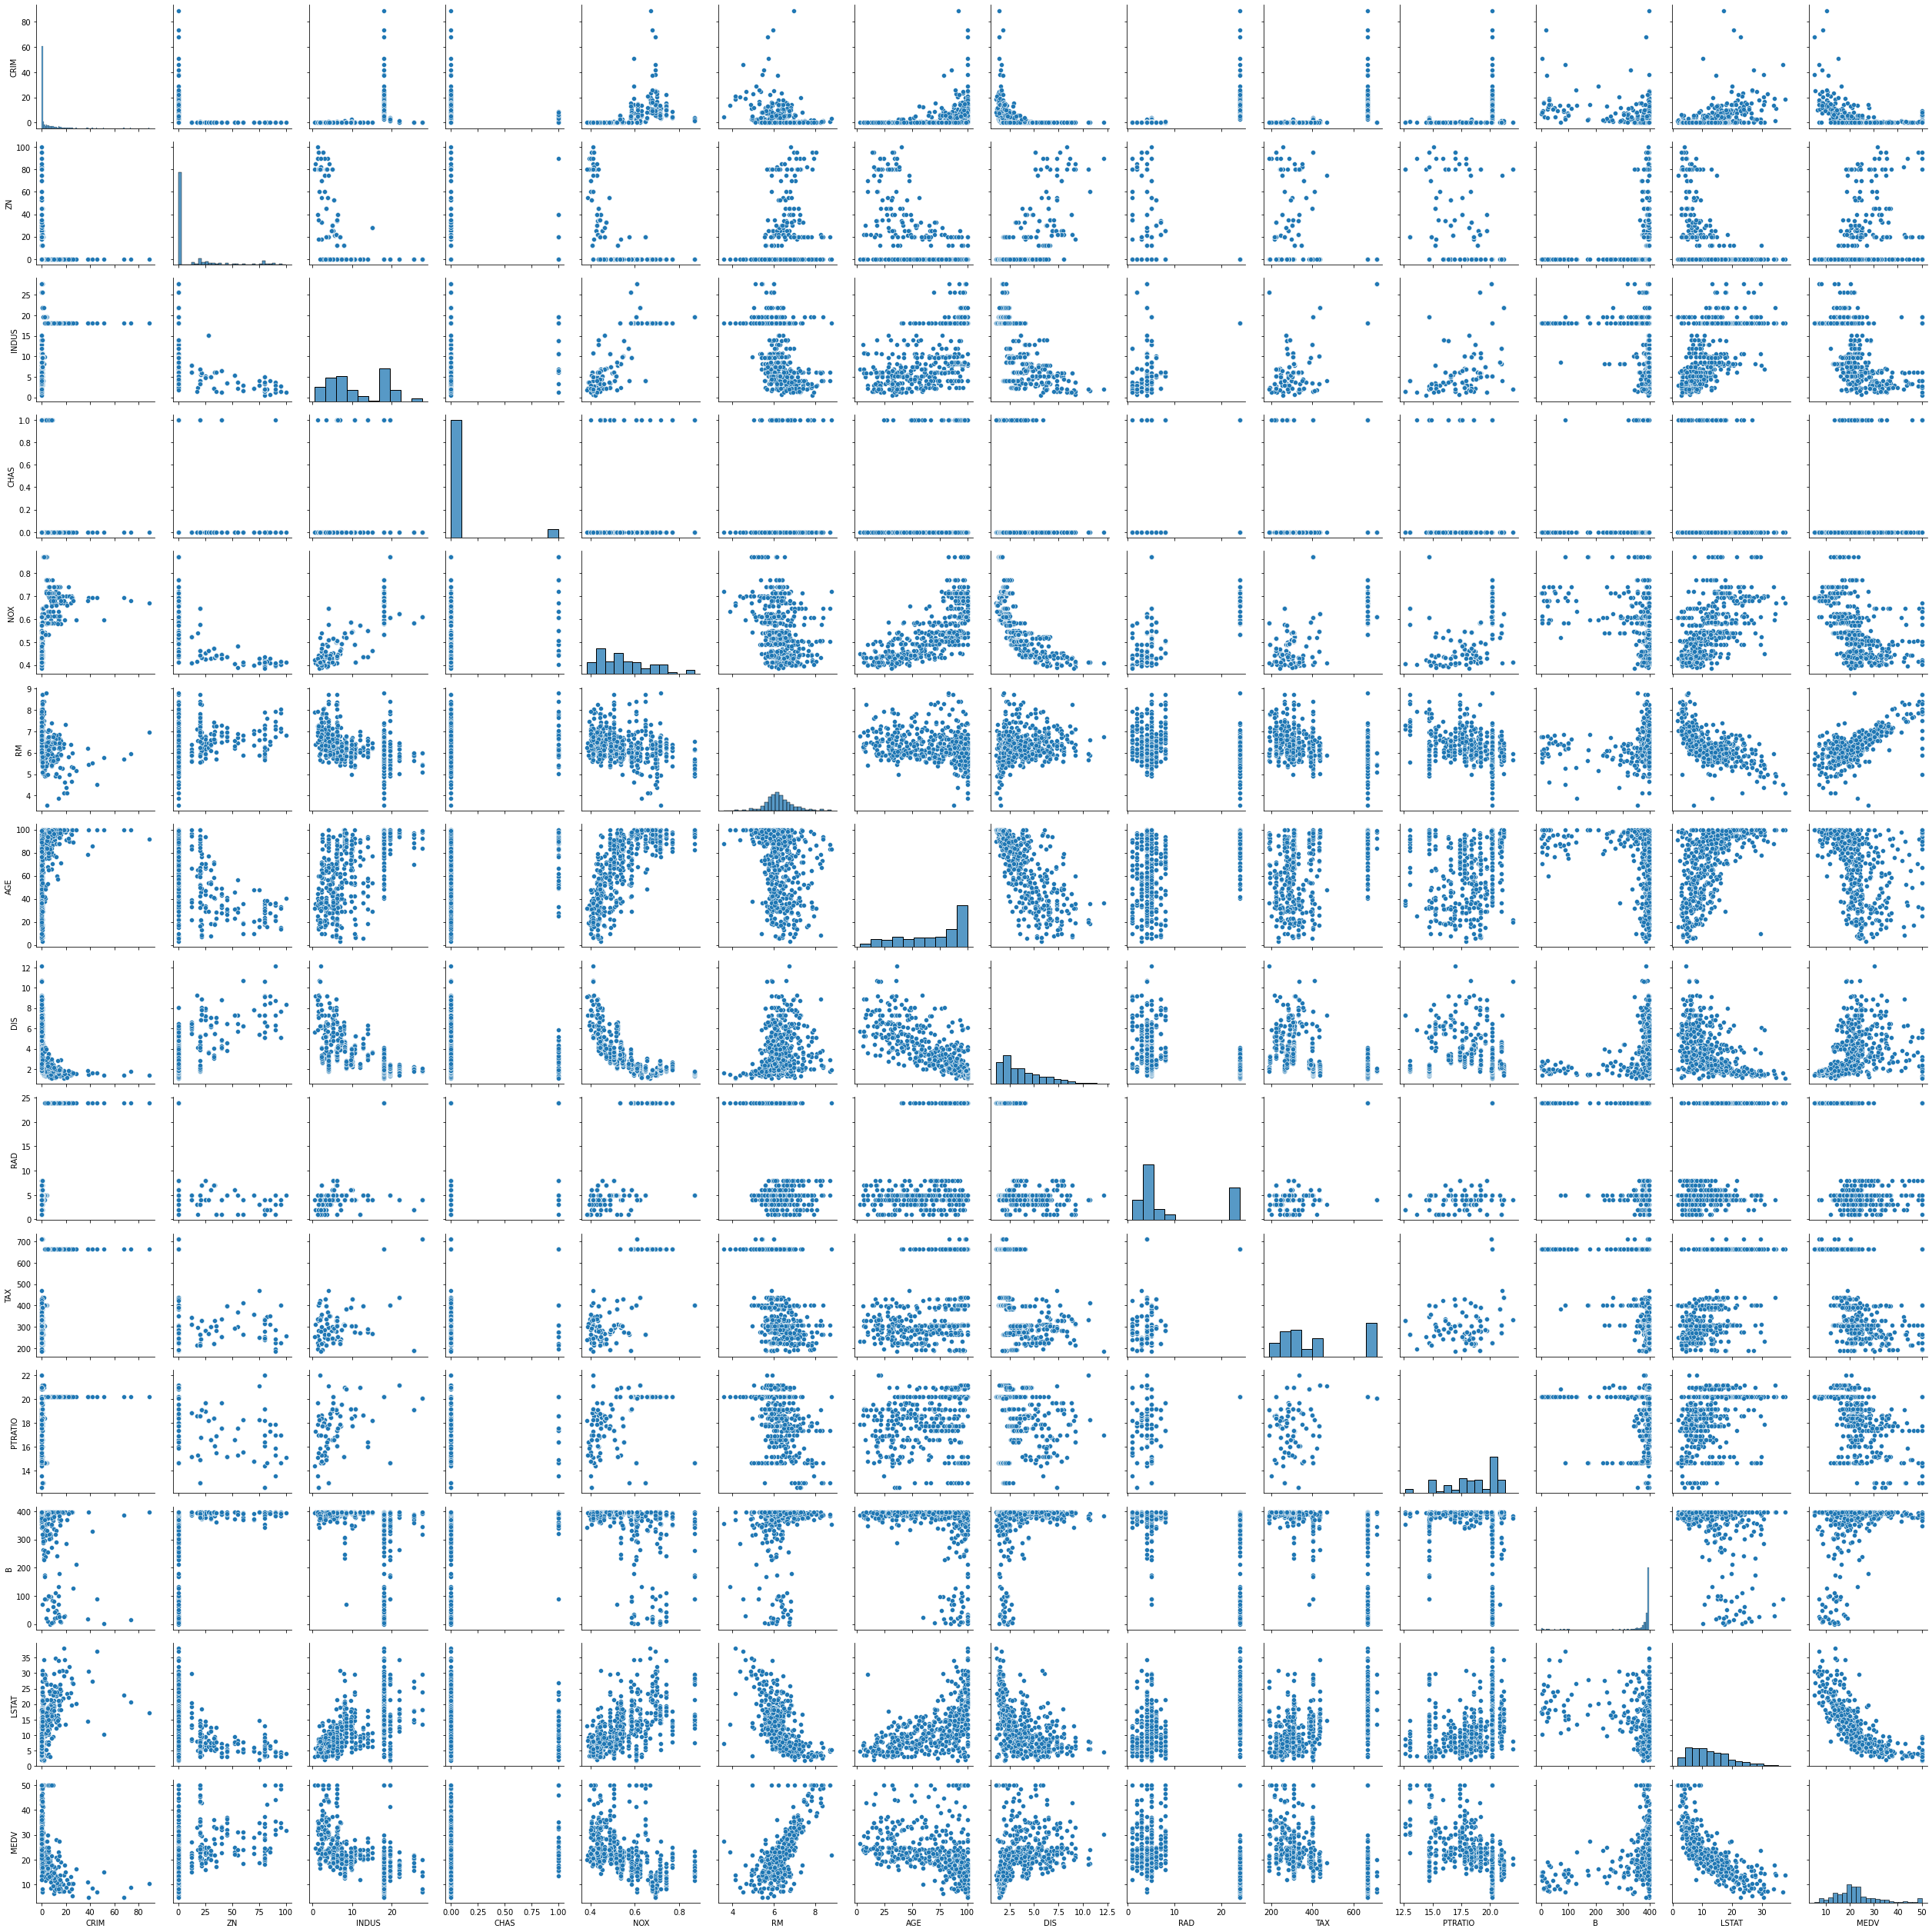

In [ ]:
# ### 산점도 행렬을 통해 변수간 상관관계 시각화

# sns.pairplot(dat)
# plt.tight_layout()
# plt.show()

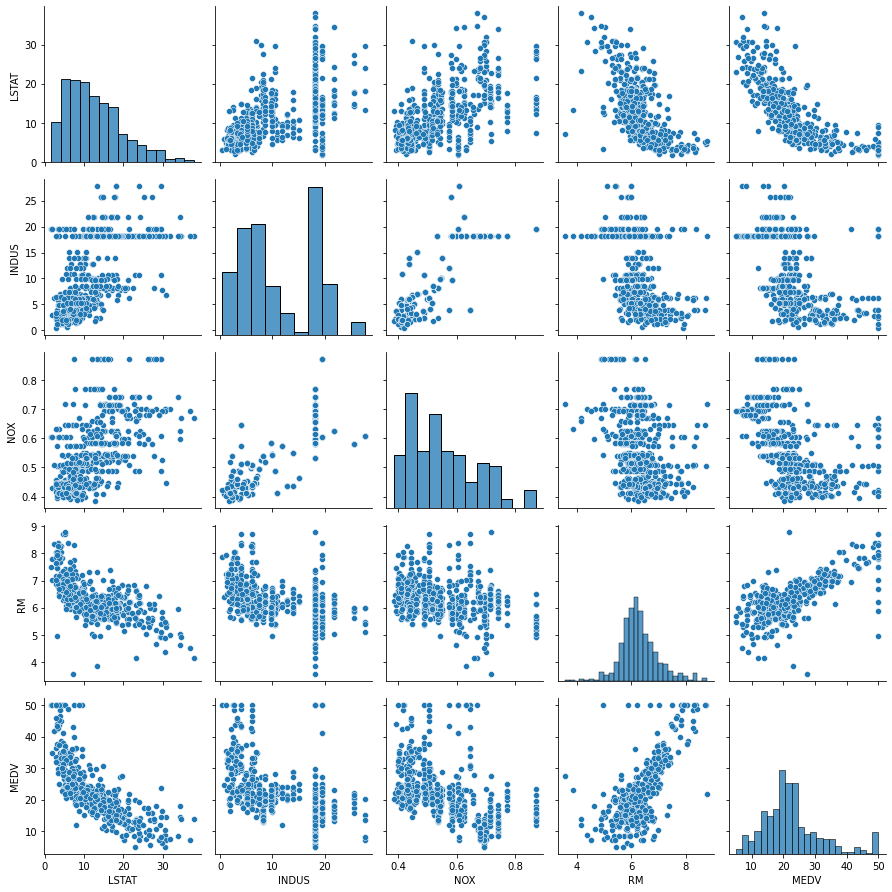

In [ ]:
# 일부 변수에 대해 산점도 행렬 그리기 
eda_cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(dat[eda_cols])
plt.tight_layout()
plt.show()

<AxesSubplot:>

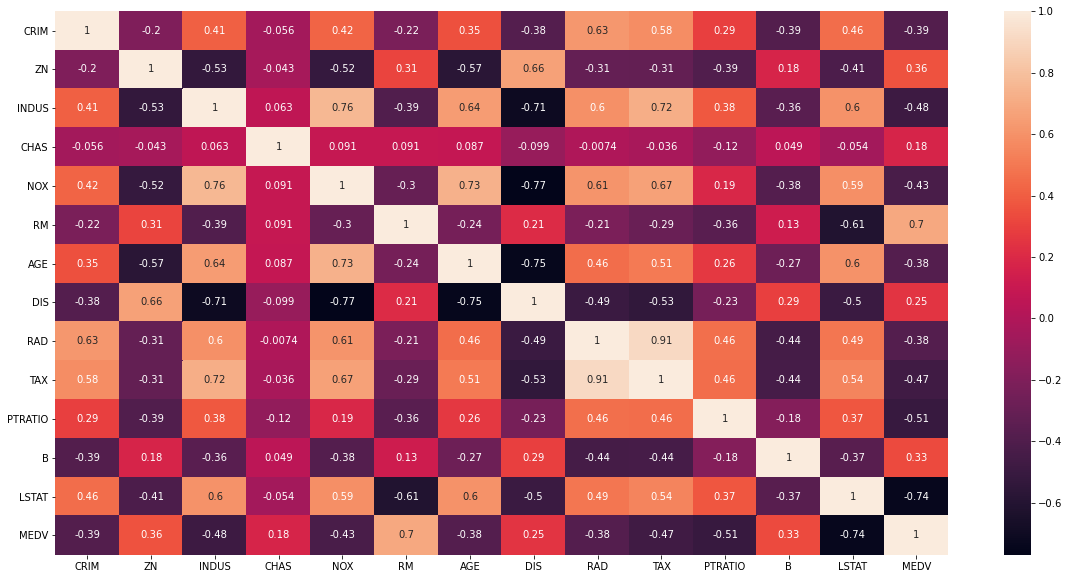

In [ ]:
### 상관관계 행렬을 통해 변수간 상관관계 시각화
plt.figure(figsize=(20, 10))
sns.heatmap(dat.corr(),  annot=True)

## 모델 학습

### 데이터 분할

In [ ]:
X = dat.iloc[:, :-1].values # MEDV 제외 모든 변수 사용 
y = dat['MEDV'].values

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 데이터 scaling

In [ ]:
### scaling 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### 학습

In [ ]:
## linear regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
## random forest
rf = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=123)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

## 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE - Linear Regression : %.3f' % (mean_squared_error(y_test, y_pred_lr)))
print('MSE - RandomForest : %.3f' % mean_squared_error(y_test, y_pred_rf))

MSE - Linear Regression : 29.448
MSE - RandomForest : 16.929
